https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

https://www.kaggle.com/datasets/whenamancodes/play-store-apps

In [220]:
import pandas as pd
import numpy as np

# For Content-Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# For Collaborative Filtering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the orders dataset from the local 'dataset' folder
orders_df = pd.read_csv('dataset/olist_orders_dataset.csv')
customers_df = pd.read_csv('dataset/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('dataset/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
products_df = pd.read_csv('dataset/olist_products_dataset.csv')
sellers_df = pd.read_csv('dataset/olist_sellers_dataset.csv')
product_category_name_translation_df = pd.read_csv('dataset/product_category_name_translation.csv')

In [221]:
# Load the dataset from JSON file (JSON Lines format)
modcloth_final_data = pd.read_json('dataset/modcloth_final_data/modcloth_final_data.json', lines=True)
modcloth_final_data.head()
#modcloth_final_data['review_summary'][modcloth_final_data['review_summary'].notna()].head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [222]:
# Load the dataset from JSON file (JSON Lines format)
renttherunway_final_data = pd.read_json('dataset/renttherunway_final_data/renttherunway_final_data.json', lines=True)
renttherunway_final_data.head()
#renttherunway_final_data['review_summary'][renttherunway_final_data['review_summary'].notna()].head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [223]:
import re

# Function to convert column names to snake_case
def to_snake_case(col):
    col = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', col)
    col = re.sub('([a-z0-9])([A-Z])', r'\1_\2', col)
    col = col.replace('__', '_')
    col = col.replace(' ', '_')
    col = col.replace('.', '_')
    col = col.replace('-', '_')
    return col.lower()

In [224]:
renttherunway_final_data.columns = [to_snake_case(col) for col in renttherunway_final_data.columns]
renttherunway_final_data.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [225]:
# Data cleaning for renttherunway_final_data

# 1. Remove duplicates
renttherunway_final_data = renttherunway_final_data.drop_duplicates()

# 2. Drop rows with missing essential values (e.g., item_id, review_text, rating)
renttherunway_final_data = renttherunway_final_data.dropna(subset=['item_id', 'review_text', 'rating'])

# 3. Fill missing values in less critical columns with sensible defaults
renttherunway_final_data['body_type'] = renttherunway_final_data['body_type'].fillna('unknown')
renttherunway_final_data['category'] = renttherunway_final_data['category'].fillna('unknown')
renttherunway_final_data['age'] = renttherunway_final_data['age'].fillna(renttherunway_final_data['age'].median())

# 4. Strip whitespace from string columns
for col in ['review_text', 'body_type', 'category']:
    renttherunway_final_data[col] = renttherunway_final_data[col].astype(str).str.strip()

# 5. Reset index after cleaning
renttherunway_final_data = renttherunway_final_data.reset_index(drop=True)

# Display cleaned dataframe summary
renttherunway_final_data.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,unknown,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [226]:
play_store_df = pd.read_csv('dataset/play_store/googleplaystore.csv')
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [227]:

play_store_df.columns = [to_snake_case(col) for col in play_store_df.columns]
play_store_df.head()

,app,category,rating,reviews,size,installs,type,price,content__rating,genres,last__updated,current__ver,android__ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [228]:
play_store_review_df = pd.read_csv('dataset/play_store/googleplaystore_user_reviews.csv')
play_store_review_df.columns = [to_snake_case(col) for col in play_store_review_df.columns]
play_store_review_df.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [229]:
# 5. Create the final "ratings" dataframe with review count
ratings_df = renttherunway_final_data.groupby(['item_id'])['rating'] \
    .agg(['mean', 'count']).reset_index() \
    .rename(columns={'mean': 'reviews_average', 'count': 'reviews_count'}).copy()

In [230]:
# 5. Create the final "ratings" dataframe with review count
ratings_df.head()

,item_id,reviews_average,reviews_count
0,123373,8.801749,686
1,123793,9.537653,1713
2,124204,9.308176,795
3,124553,8.563895,493
4,125424,8.995708,466


## weighted rating formula as a metric/score.

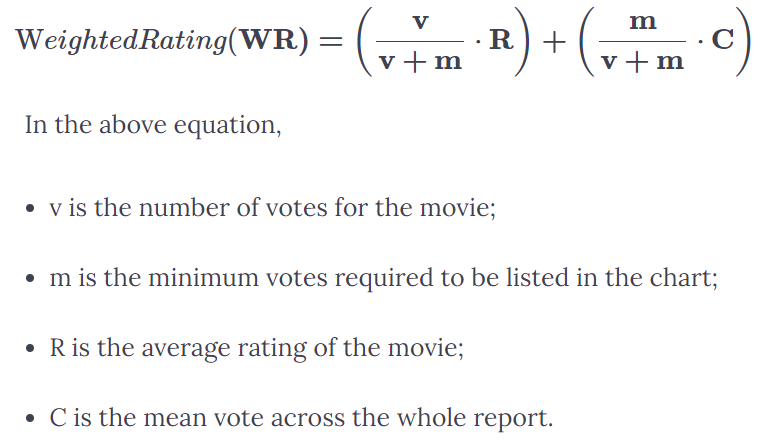

In [231]:
from IPython.display import Image
Image(filename =r'Im1.png')

In [232]:
# Calculate mean of vote average column
C = ratings_df['reviews_average'].mean()
print(C)

9.005313652409813


In [233]:
# Calculate the minimum number of votes required to be in the chart, m
m = ratings_df['reviews_count'].sum()
print(m)

192274


In [234]:
# Calculate the total votes 
m = ratings_df['reviews_count'].quantile(0.90)
print(m)

66.0


In [235]:
# Filter out all qualified products into a new DataFrame
q_ratings = ratings_df.copy().loc[ratings_df['reviews_count'] >= m]
q_ratings.shape

(596, 3)

In [236]:
ratings_df.shape

(5850, 3)

In [237]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m = m, C = C):
    v = x['reviews_count']
    R = x['reviews_average']
    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)

In [238]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_ratings['score'] = q_ratings.apply(weighted_rating, axis = 1)

In [239]:
# Sort products based on score calculated above
q_ratings = q_ratings.sort_values('score', ascending = False)

# Print top 20 products
q_ratings[['item_id', 'reviews_count', 'reviews_average', 'score']].head(20)
# Drop all rows where 'score' is above 10
q_ratings = q_ratings[q_ratings['score'] <= 10]
q_ratings.head()

,item_id,reviews_average,reviews_count,score
1948,1064397,9.781690,284,9.635288
1223,709832,9.726316,190,9.540432
2260,1213427,9.649351,308,9.535697
1608,903647,9.762238,143,9.523209
2599,1378631,9.624242,330,9.521088


## Content-Based Recommender

In [240]:
renttherunway_final_data['review_text'].head()

0    An adorable romper! Belt and zipper were a lit...
1    I rented this dress for a photo shoot. The the...
2    This hugged in all the right places! It was a ...
3    I rented this for my company's black tie award...
4    I have always been petite in my upper body and...
Name: review_text, dtype: object

In [241]:
#!pip install nltk

In [242]:
import nltk
# You may need to download the stop words list first
#nltk.download('stopwords')

# 1. Get the list of Portuguese stop words from NLTK
portuguese_stop_words = nltk.corpus.stopwords.words('portuguese')



In [243]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all portuguese stop words such as 'de', 'um'
tfidf = TfidfVectorizer(stop_words = portuguese_stop_words)

#Replace NaN with an empty string
renttherunway_final_data['review_text'] = renttherunway_final_data['review_text'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(renttherunway_final_data['review_text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# This code segment prepares the text data from the 'review_comment_message' column of the 'order_reviews_df' DataFrame for further analysis 
# by converting it into a numerical representation using TF-IDF vectorization.

(192274, 28276)

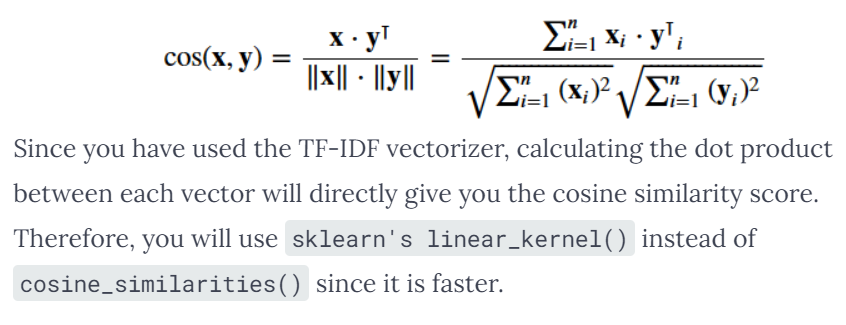

In [244]:
from IPython.display import Image
Image(filename =r'Im2.png')

In [245]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
#cosine_sim = linear_kernel(tfidf_matrix[:10000], tfidf_matrix[:10000])
cosine_sim = linear_kernel(tfidf_matrix[:20000], tfidf_matrix[:20000])

In [246]:
cosine_sim.shape

(20000, 20000)

In [247]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(renttherunway_final_data.index, index=renttherunway_final_data['item_id']).drop_duplicates()
indices[:10]

item_id
2260466    0
153475     1
1063761    2
126335     3
616682     4
364092     5
568429     6
130259     7
1729232    8
1729232    9
dtype: int64

In [248]:
'''# Function that takes in movie title as input and outputs most similar products
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all products with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return merged_df['product_id'].iloc[product_indices]'''

"# Function that takes in movie title as input and outputs most similar products\ndef get_recommendations(title, cosine_sim=cosine_sim):\n    # Get the index of the movie that matches the title\n    idx = indices[title]\n\n    # Get the pairwsie similarity scores of all products with that movie\n    sim_scores = list(enumerate(cosine_sim[idx]))\n\n    # Sort the products based on the similarity scores\n    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)\n\n    # Get the scores of the 10 most similar products\n    sim_scores = sim_scores[1:11]\n\n    # Get the product indices\n    product_indices = [i[0] for i in sim_scores]\n\n    # Return the top 10 most similar products\n    return merged_df['product_id'].iloc[product_indices]"

In [249]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index/indices of the product that matches the title
    idx = indices[title]
    # If multiple indices (duplicate product_id), use the first one
    if isinstance(idx, (pd.Series, np.ndarray)):
        idx = idx.iloc[0] if isinstance(idx, pd.Series) else idx[0]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return renttherunway_final_data['item_id'].iloc[product_indices]

In [250]:
random_app = renttherunway_final_data.sample(1)['item_id'].values[0]
print(random_app)

2216225


In [251]:
get_recommendations(1714731)

9244     1000739
9721      141688
10259     184374
17206     616682
17818     616682
17983    1378631
16743     126335
9467     1241304
7516      730008
3961     1229740
Name: item_id, dtype: int64

In [252]:
renttherunway_final_data.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [253]:
soup_features = ['body_type','category', 'height', 'size', 'age']
renttherunway_final_data[soup_features].head()

,body_type,category,height,size,age
0,hourglass,romper,"5' 8""",14,28.0
1,straight & narrow,gown,"5' 6""",12,36.0
2,unknown,sheath,"5' 4""",4,116.0
3,pear,dress,"5' 5""",8,34.0
4,athletic,gown,"5' 9""",12,27.0


In [254]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [255]:
# Apply clean_data function to your features.
features = ['body_type','category', 'height', 'size', 'age']

for feature in features:
    renttherunway_final_data[feature] = renttherunway_final_data[feature].apply(clean_data)

In [256]:
def create_soup(x):
    return ' '.join(x['body_type']) + ' ' + ' '.join(x['category']) + ' ' + x['height'] + ' ' + ' '.join(x['size']) + ' ' + ' '.join(x['age'])

In [257]:
# Create a new soup feature
renttherunway_final_data['soup'] = renttherunway_final_data.apply(create_soup, axis = 1)
renttherunway_final_data[['soup']].head(5)

,soup
0,"h o u r g l a s s r o m p e r 5'8"""
1,"s t r a i g h t & n a r r o w g o w n 5'6"""
2,"u n k n o w n s h e a t h 5'4"""
3,"p e a r d r e s s 5'5"""
4,"a t h l e t i c g o w n 5'9"""


In [258]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words=portuguese_stop_words)
count_matrix = count.fit_transform(renttherunway_final_data['soup'])

In [259]:
count_matrix.shape

(192274, 2)

In [260]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix[:15000], count_matrix[:15000])

In [261]:
# Reset index of your main DataFrame and construct reverse mapping as before
renttherunway_final_data = renttherunway_final_data.reset_index()
indices = pd.Series(renttherunway_final_data.index, index=renttherunway_final_data['item_id']).drop_duplicates()

In [262]:
random_app = renttherunway_final_data.sample(1)['item_id'].values[0]
print(random_app)

1934214


In [263]:
# Content based Filtering
get_recommendations(259136, cosine_sim2)

1      153475
2     1063761
3      126335
4      616682
5      364092
6      568429
7      130259
8     1729232
9     1729232
10    1077123
Name: item_id, dtype: int64

In [264]:
import pandas as pd                    # Import pandas for data manipulation and analysis
import numpy as np                     # Import NumPy for numerical computations and array operations
from scipy.sparse import csr_matrix    # Import csr_matrix for creating sparse matrices (efficient storage of large matrices with many zeros)
from sklearn.neighbors import NearestNeighbors  # Import NearestNeighbors for building K-Nearest Neighbors (KNN) recommendation models
import matplotlib.pyplot as plt        # Import matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns                  # Import seaborn for advanced and visually appealing statistical data visualizations

# Item-based Collaborative Filtering 

https://www.kaggle.com/datasets/salmanafh/product-recommendation-dataset-agrease-capstone?select=user_reviews.csv

In [265]:
path = "dataset/product_recommendation/"


product_df = pd.read_csv(f"{path}/product.csv")
user_review_df = pd.read_csv(f"{path}/user_reviews.csv")

In [266]:
#user_review_df = renttherunway_final_data.copy()
#user_review_df.head()

In [267]:
user_review_df.columns

Index(['productname', 'rating', 'user_id', 'category'], dtype='object')

In [268]:
product_df.columns

Index(['productname', 'productdescription', 'rating', 'sellerid', 'price',
       'stock', 'image', 'category'],
      dtype='object')

In [269]:
# Rename columns in product_df as requested
product_df = product_df.rename(columns={
    'productname': 'product_id',
    'productdescription': 'product_description',
    'sellerid': 'seller_id'
})

# Display the updated columns to verify
print(product_df.columns)

Index(['product_id', 'product_description', 'rating', 'seller_id', 'price',
       'stock', 'image', 'category'],
      dtype='object')


In [270]:
user_review_df = user_review_df.rename(columns={'productname': 'product_id', 'rating': 'review_score', 'user_id': 'customer_id', 'category': 'category'})

In [271]:
user_review_df.head()

,product_id,review_score,customer_id,category
0,"herbisida obat pembasmi rumput liar, gulma, al...",5,Bambang,Pestisida & Obat Pertanian
1,"herbisida obat pembasmi rumput liar, gulma, al...",5,Dimas,Pestisida & Obat Pertanian
2,"herbisida obat pembasmi rumput liar, gulma, al...",5,Bambang,Pestisida & Obat Pertanian
3,"herbisida obat pembasmi rumput liar, gulma, al...",5,Rezky,Pestisida & Obat Pertanian
4,"herbisida obat pembasmi rumput liar, gulma, al...",5,Dendy,Pestisida & Obat Pertanian


In [272]:
# Define column names (headers) for the MovieLens dataset
header = ['customer_id', 'product_id', 'review_score']
user_review_df[header].head()

,customer_id,product_id,review_score
0,Bambang,"herbisida obat pembasmi rumput liar, gulma, al...",5
1,Dimas,"herbisida obat pembasmi rumput liar, gulma, al...",5
2,Bambang,"herbisida obat pembasmi rumput liar, gulma, al...",5
3,Rezky,"herbisida obat pembasmi rumput liar, gulma, al...",5
4,Dendy,"herbisida obat pembasmi rumput liar, gulma, al...",5


In [273]:
num_unique_products = user_review_df['product_id'].nunique()
print(f"Number of unique products: {num_unique_products}")

Number of unique products: 113


## Transforming data into the matrix

Next, we transform the dataset into a matrix where each row represents the user and column represents the item.

The n_users defines the number of users whereas n_items defines the number of items in the dataset. The loop iterates through each row of the dataframe and extracts ratings from it to form the user-item rating matrix.

In [274]:
num_customers = user_review_df['customer_id'].nunique()
num_products = user_review_df['product_id'].nunique()
print(f"Number of unique customers: {num_customers}")
print(f"Number of unique products: {num_products}")

Number of unique customers: 17512
Number of unique products: 113


In [275]:
# Initialize an empty user-item rating matrix with zeros
# Rows = users, Columns = items
A = np.zeros((num_customers, num_products))
print(A.shape)

# Fill the rating matrix with user-item ratings from the dataset
# Each row represents a user, each column represents an item
# Map customer_id and product_id to matrix indices
user_to_idx = {user_id: idx for idx, user_id in enumerate(user_review_df['customer_id'].unique())}
product_to_idx = {product_id: idx for idx, product_id in enumerate(user_review_df['product_id'].unique())}

for row in user_review_df.itertuples():
    user_idx = user_to_idx[row.customer_id]
    product_idx = product_to_idx[row.product_id]
    A[user_idx, product_idx] = row.review_score

# Display the original user-item rating matrix
print("Original rating matrix:\n", A)

(17512, 113)
Original rating matrix:
 [[3. 3. 5. ... 3. 0. 0.]
 [5. 3. 2. ... 4. 0. 0.]
 [5. 4. 0. ... 4. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]]


In this notebook, we are working with an e-commerce product review dataset, where users rate products on a scale of 1-5 (1 being the lowest, 5 the highest). However, the interpretation of ratings can vary between users. For example, a rating of 3 might be considered good by one user but average by another.

To address this ambiguity, many modern platforms (such as Netflix or YouTube) have shifted to binary ratings. Therefore, in this notebook, we convert the product ratings into binary values to align with current research trends.

The code below transforms the product review dataset into a binary format: ratings greater than or equal to 3 are considered as "liked" (1), while ratings less than 3 are considered as "not liked" (0). Since we are primarily interested in whether a user likes a product, treating ratings below 3 as 0 does not negatively impact the recommendation process.

In [276]:
# Loop through each user (row) in the rating matrix
for i in range(len(A)):
    # Loop through each item (column) in the rating matrix
    for j in range(len(A[0])):
        # Convert ratings into binary values:
        # If rating >= 3 -> liked (1), else -> not liked (0)
        if A[i][j] >= 3:
            A[i][j] = 1
        else:
            A[i][j] = 0

In [277]:
# Convert the dense NumPy array 'A' into a Compressed Sparse Row (CSR) matrix
from scipy.sparse import csr_matrix

csr_sample = csr_matrix(A)        # Efficient storage format for sparse data

# Print the sparse matrix (shows non-zero element positions and values)
print(csr_sample)
# (row_index, column_index)	value

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 7)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 18)	1.0
  (0, 20)	1.0
  (0, 21)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 26)	1.0
  (0, 27)	1.0
  (0, 28)	1.0
  (0, 30)	1.0
  (0, 37)	1.0
  (0, 41)	1.0
  (0, 44)	1.0
  (0, 48)	1.0
  :	:
  (17495, 19)	1.0
  (17496, 42)	1.0
  (17497, 51)	1.0
  (17498, 73)	1.0
  (17500, 42)	1.0
  (17502, 73)	1.0
  (17503, 19)	1.0
  (17503, 73)	1.0
  (17504, 28)	1.0
  (17505, 51)	1.0
  (17506, 19)	1.0
  (17507, 42)	1.0
  (17508, 28)	1.0
  (17510, 19)	1.0
  (17510, 27)	1.0
  (17510, 28)	1.0
  (17510, 42)	1.0
  (17510, 51)	1.0
  (17510, 73)	1.0
  (17511, 19)	1.0
  (17511, 27)	1.0
  (17511, 28)	1.0
  (17511, 42)	1.0
  (17511, 51)	1.0
  (17511, 73)	1.0


## Items Similarity Computation
Compute similarity between items of csr_sample using cosine similarity as shown below:

In [278]:
# Import NearestNeighbors for finding similar users or items
from sklearn.neighbors import NearestNeighbors

# Initialize the K-Nearest Neighbors (KNN) model
knn = NearestNeighbors(
    metric      = 'cosine',     # Use cosine similarity to measure closeness between users/items
    algorithm   = 'brute',      # Brute-force search (good for sparse data)
    n_neighbors = 3,            # Number of nearest neighbors to find
    n_jobs      = -1            # Use all available CPU cores for faster computation
)

# Fit the KNN model using the sparse user-item matrix
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

## Generate Recommendations
Once, the similarity between items is computed, the final step is to generate recommendations for the target user. Here, we are generating recommendations for the user_id: 1.

We generate recommendations for user_id:1 based on 20 items being liked by him. So, we first get the 20 items being liked/consumed by the user as shown below:

In [279]:
# Sort the dataset by customer_id (ascending) 
# This ensures we get the most recent items rated/liked by each user first
dataset_sort_des = user_review_df.sort_values(['customer_id'], ascending = [True])

# Filter the dataset for a specific user (e.g., user_id = 1)
filter1 = dataset_sort_des[dataset_sort_des['customer_id'] == 'Maradona G.'].product_id

# Convert the 'product_id' column values to a Python list
filter1 = filter1.tolist()

# Select only the top 5 most recent items liked by the user_id mentioned above
filter1 = filter1[:5]

# Display the list of items liked by user 1, one per line
print("Items liked by user:")
for item in filter1:
    print("-", item)

Items liked by user:
- Mangga Harum Manis (1kg) Sayurbox
- INFARM - Pupuk Organik Cair Tanaman Buah / Bunga 500mL POC Kompos
- Bubble Wrap Hitam Surabaya! Kirim Kilat 1.25M x 50M! Termurah ! - Medium 2.2Kg
- minyak goreng kelapa spesial ikan dorang 5 liter
- pot tanaman grace ukuran 40 cm kuping warna hitam besar / pot grace warna hitam ukuran 40 cm jumbo


In [280]:
# Get the list of unique user IDs from the dataset
unique_users = user_review_df['customer_id'].unique()

Next, for each item being liked by the user 1, we recommend 2 similar items. The number of similar items to be recommended can vary depending on the need of the system.

In [281]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Build ITEM x USER sparse matrix (transpose of user x item)
item_user_csr = csr_sample.T  # shape: (n_items, n_users)

# Fit KNN for item-based similarity 
n_similar_per_item = 2
knn_items = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=n_similar_per_item + 1,  # +1 because the closest neighbor is the item itself
    n_jobs=-1
)
knn_items.fit(item_user_csr)

# Get customer_id's 5 most recent LIKED items (review_score >= 3)
customer_id = 'Maradona G.'
dataset_sort_des = user_review_df.sort_values(['customer_id'], ascending=[True])
product_liked = (
    dataset_sort_des[(dataset_sort_des['customer_id'] == customer_id) & (dataset_sort_des['review_score'] >= 3)]
    .product_id.tolist()[:5]
)

# Fallback: if fewer than 5 liked items exist, just use what's available
liked_set = set(product_liked)

# Recommend 2 similar items for each liked item
recommendations_by_seed = {}  # {liked_item_id: [rec1, rec2]}
for seed_item in product_liked:
    seed_idx = product_to_idx[seed_item]  # get index from product_to_idx

    # Find nearest neighbors for the seed item
    neigh_indices = knn_items.kneighbors(item_user_csr[seed_idx], return_distance=False)[0]

    # Convert neighbor indices (0-based) back to product_ids
    idx_to_product = {v: k for k, v in product_to_idx.items()}
    neighbor_items = [idx_to_product[idx] for idx in neigh_indices]

    # Exclude the seed itself and items the user already liked; keep first n_similar_per_item
    recs = [it for it in neighbor_items if it != seed_item and it not in liked_set]
    recs = recs[:n_similar_per_item]

    recommendations_by_seed[seed_item] = recs

# (Optional) Flatten to a unique recommendation list, preserving order
flat_unique_recs = []
seen = set(product_liked)  # avoid items already liked
for seed in product_liked:
    for it in recommendations_by_seed.get(seed, []):
        if it not in seen:
            flat_unique_recs.append(it)
            seen.add(it)


# Pretty print results
print(f"Customer {customer_id} - liked items:", product_liked)
print("\nTop similar items per liked seed:")
for seed in product_liked:
    print(f"{seed} -> {recommendations_by_seed.get(seed, [])}")

print("\nFlattened unique recommendation list (ordered by seed sequence):")
for idx, rec in enumerate(flat_unique_recs, 1):
    print(f"{idx}. {rec}")


Customer Maradona G. - liked items: ['Mangga Harum Manis (1kg) Sayurbox', 'INFARM - Pupuk Organik Cair Tanaman Buah / Bunga 500mL POC Kompos', 'minyak goreng kelapa spesial ikan dorang 5 liter', 'pot tanaman grace ukuran 40 cm kuping warna hitam besar / pot grace warna hitam ukuran 40 cm jumbo', 'herbisida obat pembasmi rumput liar, gulma, alang2 - gross']

Top similar items per liked seed:
Mangga Harum Manis (1kg) Sayurbox -> ['Keripik Nangka standart 100 gram kripik buah Malang', 'INFARM - Hormon Auksin Perangsang Akar 30 ml Kemasan Fliptop Organik']
INFARM - Pupuk Organik Cair Tanaman Buah / Bunga 500mL POC Kompos -> ['ISKU Pressure Sprayer 1L/2L Botol Semprotan Tanaman Manual /alat semprot tanaman 2L Botol Semprot']
minyak goreng kelapa spesial ikan dorang 5 liter -> ['Mesin Potong Rumput TESLA BG-328T 2 Tak / SUMURA Portable Brush Cutter Pemotong Rumput BG328T BG 328 TANOSS']
pot tanaman grace ukuran 40 cm kuping warna hitam besar / pot grace warna hitam ukuran 40 cm jumbo -> ['SE

# Coming back to the inital dataset 

## Market Basket Analysis

In [282]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [283]:
perfumes_df = pd.read_excel('dataset/perfumes.xlsx')

In [284]:
# Remove any whote spaces or specified characters at the start and end of a string. 
perfumes_df['Product Category (Enhanced Ecommerce)'] = perfumes_df['Product Category (Enhanced Ecommerce)'].str.strip()

perfumes_df['Transaction ID'] = perfumes_df['Transaction ID'].astype('str')

# Drop NA values from the column 'InvoiceNo'
perfumes_df.dropna(axis = 0, subset = ['Transaction ID'], inplace = True)

# Returns true if the characters exist and false if not.
perfumes_df = perfumes_df[~perfumes_df['Transaction ID'].str.contains('C')]

In [285]:
perfumes_df.columns = [to_snake_case(col) for col in perfumes_df.columns]
perfumes_df.columns

Index(['year', 'month_of_the_year', 'transaction_id', 'product',
       'product__category_(_enhanced__ecommerce)', 'product__brand',
       'product__revenue', 'quantity'],
      dtype='object')

In [286]:
perfumes_df = perfumes_df.rename(columns={'product__category_(_enhanced__ecommerce)': 'product_category_enhanced_ecommerce'})
perfumes_df = perfumes_df.rename(columns={'product__brand': 'product_brand'})

In [287]:
Basket = perfumes_df.groupby(['transaction_id', 'product'])['quantity'].sum().reset_index().fillna(0).set_index('transaction_id')
Basket.head()

,product,quantity
transaction_id,,
466349,Benamôr - Benamôr - Creme de Rosto 50ml,1
466349,Lancôme - La Vie Est Belle - Eau de Parfum 1.2...,1
466349,Lancôme - La Vie Est Belle - Eau de Parfum 30ml,1
466351,Benamôr - Benamôr - Creme Chantilly Hidratante...,1
466351,Benamôr - Benamôr - Sabonete original 100g,1


In [288]:
#Basket = perfumes_df[perfumes_df['product_category_enhanced_ecommerce'] == "Perfumes"].groupby(['transaction_id', 'product'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
#Basket

In [289]:
Basket = perfumes_df[perfumes_df['month_of_the_year'] == 5].groupby(['transaction_id', 'product_category_enhanced_ecommerce'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
Basket

product_category_enhanced_ecommerce,Acessórios de Moda,Acessórios manicure,After Sun Corpo,After Sun Rosto,Aftershave,Amostras,Anti-idade,Auto-bronzeadores Corpo,Auto-bronzeadores Rosto,Avolumadores,...,Senhora,Sobrancelhas,Solares,Soluções específicas,Sombras,Styling,Séruns,Tratamentos,Tónicos,Vernizes
transaction_id,,,,,,,,,,,,,,,,,,,,,
489327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
def convert(x):
  if x<= 0:
    return False
  if x>= 1:
    return True
basket = Basket.map(convert)

In [291]:
itemset = apriori(basket, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
frequent.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Protectores solares Corpo),(After Sun Corpo),0.017173,0.008213,0.004729,0.275362,33.527448,1.0,0.004588,1.368666,0.987125,0.228916,0.269362,0.425560
1,(After Sun Corpo),(Protectores solares Corpo),0.008213,0.017173,0.004729,0.575758,33.527448,1.0,0.004588,2.316664,0.978208,0.228916,0.568345,0.425560
2,(Protectores solares Corpo),(After Sun Rosto),0.017173,0.001991,0.001493,0.086957,43.673913,1.0,0.001459,1.093057,0.994176,0.084507,0.085135,0.418478
3,(After Sun Rosto),(Protectores solares Corpo),0.001991,0.017173,0.001493,0.750000,43.673913,1.0,0.001459,3.931309,0.979052,0.084507,0.745632,0.418478
4,(Anti-idade),(Delineadores),0.052265,0.020906,0.001244,0.023810,1.138889,1.0,0.000152,1.002974,0.128676,0.017301,0.002966,0.041667


In [292]:
basket.describe()

product_category_enhanced_ecommerce,Acessórios de Moda,Acessórios manicure,After Sun Corpo,After Sun Rosto,Aftershave,Amostras,Anti-idade,Auto-bronzeadores Corpo,Auto-bronzeadores Rosto,Avolumadores,...,Senhora,Sobrancelhas,Solares,Soluções específicas,Sombras,Styling,Séruns,Tratamentos,Tónicos,Vernizes
count,4018,4018,4018,4018,4018,4018,4018,4018,4018,4018,...,4018,4018,4018,4018,4018,4018,4018,4018,4018,4018
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,4017,4014,3985,4010,4010,4016,3808,4012,4009,4009,...,3802,4003,4016,3965,3948,3999,3915,3958,3978,3999


## Apriori Rule for Market Basket Analysis

In [293]:
itemset = apriori(basket, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
print(f"Number of frequent itemsets: {len(frequent)}")
frequent.head()

Number of frequent itemsets: 148


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Protectores solares Corpo),(After Sun Corpo),0.017173,0.008213,0.004729,0.275362,33.527448,1.0,0.004588,1.368666,0.987125,0.228916,0.269362,0.425560
1,(After Sun Corpo),(Protectores solares Corpo),0.008213,0.017173,0.004729,0.575758,33.527448,1.0,0.004588,2.316664,0.978208,0.228916,0.568345,0.425560
2,(Protectores solares Corpo),(After Sun Rosto),0.017173,0.001991,0.001493,0.086957,43.673913,1.0,0.001459,1.093057,0.994176,0.084507,0.085135,0.418478
3,(After Sun Rosto),(Protectores solares Corpo),0.001991,0.017173,0.001493,0.750000,43.673913,1.0,0.001459,3.931309,0.979052,0.084507,0.745632,0.418478
4,(Anti-idade),(Delineadores),0.052265,0.020906,0.001244,0.023810,1.138889,1.0,0.000152,1.002974,0.128676,0.017301,0.002966,0.041667


In [294]:
rules = association_rules(itemset, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Protectores solares Corpo),(After Sun Corpo),0.017173,0.008213,0.004729,0.275362,33.527448,1.0,0.004588,1.368666,0.987125,0.228916,0.269362,0.425560
1,(After Sun Corpo),(Protectores solares Corpo),0.008213,0.017173,0.004729,0.575758,33.527448,1.0,0.004588,2.316664,0.978208,0.228916,0.568345,0.425560
2,(Protectores solares Corpo),(After Sun Rosto),0.017173,0.001991,0.001493,0.086957,43.673913,1.0,0.001459,1.093057,0.994176,0.084507,0.085135,0.418478
3,(After Sun Rosto),(Protectores solares Corpo),0.001991,0.017173,0.001493,0.750000,43.673913,1.0,0.001459,3.931309,0.979052,0.084507,0.745632,0.418478
4,(Anti-idade),(Delineadores),0.052265,0.020906,0.001244,0.023810,1.138889,1.0,0.000152,1.002974,0.128676,0.017301,0.002966,0.041667


In [295]:
rules = association_rules(itemset, metric = "confidence", min_threshold = 0.007)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Protectores solares Corpo),(After Sun Corpo),0.017173,0.008213,0.004729,0.275362,33.527448,1.0,0.004588,1.368666,0.987125,0.228916,0.269362,0.425560
1,(After Sun Corpo),(Protectores solares Corpo),0.008213,0.017173,0.004729,0.575758,33.527448,1.0,0.004588,2.316664,0.978208,0.228916,0.568345,0.425560
2,(Protectores solares Corpo),(After Sun Rosto),0.017173,0.001991,0.001493,0.086957,43.673913,1.0,0.001459,1.093057,0.994176,0.084507,0.085135,0.418478
3,(After Sun Rosto),(Protectores solares Corpo),0.001991,0.017173,0.001493,0.750000,43.673913,1.0,0.001459,3.931309,0.979052,0.084507,0.745632,0.418478
4,(Anti-idade),(Delineadores),0.052265,0.020906,0.001244,0.023810,1.138889,1.0,0.000152,1.002974,0.128676,0.017301,0.002966,0.041667


In [296]:
rules[ (rules['lift'] >= 10) &
       (rules['confidence'] >= 0.001) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Protectores solares Corpo),(After Sun Corpo),0.017173,0.008213,0.004729,0.275362,33.527448,1.0,0.004588,1.368666,0.987125,0.228916,0.269362,0.425560
1,(After Sun Corpo),(Protectores solares Corpo),0.008213,0.017173,0.004729,0.575758,33.527448,1.0,0.004588,2.316664,0.978208,0.228916,0.568345,0.425560
2,(Protectores solares Corpo),(After Sun Rosto),0.017173,0.001991,0.001493,0.086957,43.673913,1.0,0.001459,1.093057,0.994176,0.084507,0.085135,0.418478
3,(After Sun Rosto),(Protectores solares Corpo),0.001991,0.017173,0.001493,0.750000,43.673913,1.0,0.001459,3.931309,0.979052,0.084507,0.745632,0.418478
42,(Iluminadores),(Bases Liquidas),0.003982,0.038825,0.001742,0.437500,11.268429,1.0,0.001588,1.708755,0.914900,0.042424,0.414779,0.241186
43,(Bases Liquidas),(Iluminadores),0.038825,0.003982,0.001742,0.044872,11.268429,1.0,0.001588,1.042811,0.948065,0.042424,0.041053,0.241186
66,(Blush),(Pós),0.007715,0.011946,0.001742,0.225806,18.901882,1.0,0.001650,1.276236,0.954459,0.097222,0.216446,0.185820
67,(Pós),(Blush),0.011946,0.007715,0.001742,0.145833,18.901882,1.0,0.001650,1.161699,0.958546,0.097222,0.139192,0.185820
70,(Celulite),(Firmeza & Celulite),0.007715,0.011448,0.001742,0.225806,19.723703,1.0,0.001654,1.276879,0.956681,0.100000,0.216840,0.188990
71,(Firmeza & Celulite),(Celulite),0.011448,0.007715,0.001742,0.152174,19.723703,1.0,0.001654,1.170387,0.960293,0.100000,0.145582,0.188990


In [297]:
Basket2 = perfumes_df[perfumes_df['month_of_the_year'] == 10].groupby(['transaction_id', 'product_category_enhanced_ecommerce'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
Basket2

product_category_enhanced_ecommerce,Acessórios manicure,Aftershave,Amostras,Anti-idade,Auto-bronzeadores Corpo,Auto-bronzeadores Rosto,Avolumadores,BB Cream & CC Cream,Banho,Barba,...,Sobrancelhas,Solares,Soluções específicas,Sombras,Styling,Séruns,Tez,Tratamentos,Tónicos,Vernizes
transaction_id,,,,,,,,,,,,,,,,,,,,,
524380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
524385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
basket2 = Basket2.map(convert)

In [299]:
itemset = apriori(basket2, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1)
print(f"Number of frequent itemsets: {len(frequent)}")
frequent.head()

Number of frequent itemsets: 242


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Anti-idade),(Amostras),0.048105,0.005003,0.001155,0.024000,4.797231,1.0,0.000914,1.019464,0.831548,0.022222,0.019093,0.127385
1,(Amostras),(Anti-idade),0.005003,0.048105,0.001155,0.230769,4.797231,1.0,0.000914,1.237464,0.795526,0.022222,0.191896,0.127385
2,(Séruns),(Amostras),0.040793,0.005003,0.003271,0.080189,16.028483,1.0,0.003067,1.081740,0.977485,0.076923,0.075564,0.367017
3,(Amostras),(Séruns),0.005003,0.040793,0.003271,0.653846,16.028483,1.0,0.003067,2.771043,0.942325,0.076923,0.639125,0.367017
4,(Anti-idade),(Bases Liquidas),0.048105,0.040408,0.002501,0.052000,1.286876,1.0,0.000558,1.012228,0.234190,0.029083,0.012080,0.056952


## FP Growth Algorithm

In [300]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [301]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(basket, min_support=0.001,use_colnames = True)

print(frequent_itemsets_fp1)

      support                                      itemsets
0    0.069189                                 (Hidratantes)
1    0.002489                         (BB Cream & CC Cream)
2    0.513937                                    (Perfumes)
3    0.027875                     (Limpeza Desmaquilhantes)
4    0.022150                                      (Champô)
..        ...                                           ...
150  0.001742                (Iluminadores, Bases Liquidas)
151  0.001742                    (Pré-base, Bases Liquidas)
152  0.001244                          (Pré-base, Máscaras)
153  0.003484                       (Condicionador, Champô)
154  0.004729  (Protectores solares Corpo, After Sun Corpo)

[155 rows x 2 columns]


In [302]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0.04)

rules_fp1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Hidratantes),(Perfumes),0.069189,0.513937,0.007218,0.104317,0.202975,1.0,-0.028341,0.542672,-0.808377,0.012532,-0.842732,0.059180
1,(Limpeza Desmaquilhantes),(Perfumes),0.027875,0.513937,0.003484,0.125000,0.243220,1.0,-0.010841,0.555500,-0.761945,0.006472,-0.800179,0.065890
2,(Limpeza Desmaquilhantes),(Hidratantes),0.027875,0.069189,0.005973,0.214286,3.097122,1.0,0.004045,1.184669,0.696535,0.065574,0.155882,0.150308
3,(Hidratantes),(Limpeza Desmaquilhantes),0.069189,0.027875,0.005973,0.086331,3.097122,1.0,0.004045,1.063980,0.727451,0.065574,0.060133,0.150308
4,(Limpeza Desmaquilhantes),(Olhos & Lábios),0.027875,0.030861,0.002489,0.089286,2.893145,1.0,0.001629,1.064152,0.673118,0.044248,0.060285,0.084965


--- 

# Data Visualization

In [303]:
eda_merged_df.isnull().sum().sort_values(ascending=False)

c:\Users\junio\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\junio\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\junio\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\junio\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'eda_merged_df' is not defined

In [ ]:
# Fill null values in merged_df
# For numeric columns, fill with 0; for object columns, fill with empty string
for col in eda_merged_df.columns:
    if eda_merged_df[col].dtype == 'O':
        eda_merged_df[col] = eda_merged_df[col].fillna('')
    else:
        eda_merged_df[col] = eda_merged_df[col].fillna(0)

# Check if nulls remain
print(eda_merged_df.isnull().sum().sort_values(ascending=False))

order_id                         0
order_item_id                    0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_lenght       0
product_name_lenght              0
product_category_name            0
review_answer_timestamp          0
review_creation_date             0
review_comment_message           0
review_comment_title             0
review_score                     0
review_id                        0
customer_state                   0
customer_city                    0
customer_zip_code_prefix         0
customer_unique_id               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id                      0
freight_value                    0
price                            0
shipping_limit_date 

In [ ]:
eda_merged_df = eda_merged_df.dropna()
eda_merged_df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000,113314.000000
mean,1.198528,120.478701,19.979428,35122.306670,3.998950,48.083653,775.704856,2.175512,2091.582735,30.157703,16.581879,22.999885
std,0.707016,183.279678,15.783227,29869.796752,1.429744,11.507789,653.781424,1.727113,3749.599436,16.154927,13.439764,11.711140
min,1.000000,0.850000,0.000000,1003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,11310.000000,3.000000,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.260000,24340.000000,5.000000,51.000000,594.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,59041.500000,5.000000,57.000000,979.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,99990.000000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
eda_merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
feature = ['order_id', 'payment_value']
#eda_merged_df[feature]